In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#file = 'D:\work\Jira_analyses\out_csv.csv'
file_extended = 'E:\work\my tasks\Jira_analyses\out_csv1.csv'
file = 'E:\work\my tasks\Jira_analyses\out_csv.csv'

In [37]:
#load source file
users = pd.read_csv(file,
                        encoding="utf-8-sig",
                       sep=";",
                       usecols =['KEY','AUTHOR_NAME','DATE_CREATED','OLD_VALUE','NEW_VALUE'])
#load source file
users_extended = pd.read_csv(file_extended,
                        encoding="utf-8-sig",
                       sep=";",
                       usecols =['KEY','ID','AUTHOR_NAME','AUTHOR_DISPLAY_NAME','ACTIVE','TIME_ZONE','DATE_CREATED',
                                 'FIELD','OLD_VALUE','NEW_VALUE','OLD_NUM','NEW_NUM'])
#KEY;AUTHOR_NAME;AUTHOR_DISPLAY_NAME;ACTIVE;TIME_ZONE;DATE_CREATED;FIELD;OLD_VALUE;NEW_VALUE;OLD_NUM;NEW_NUM

In [39]:
#adding end_dates column to source data frame. end dates are nothing but start_dates shifted on 1 value 
# since each new line has start date which is end date for previous status
end_dates = users['DATE_CREATED'].tolist();
end_dates.pop(0)
end_dates.append('null')
users = users.assign(END_DATES = pd.Series(end_dates))
#print(users.groupby('KEY').tail(2))

#### extended report
#adding end_dates column to source data frame. end dates are nothing but start_dates shifted on 1 value 
# since each new line has start date which is end date for previous status
end_dates = users_extended['DATE_CREATED'].tolist();
end_dates.pop(0)
end_dates.append('null')
users_extended = users_extended.assign(END_DATES = pd.Series(end_dates))
#print(users.groupby('KEY').tail(2))


In [41]:
#set last end_date for each story as a last update date of the story
oldvalue = users.iloc[0]
for index, row in users.iterrows():
    if oldvalue.KEY != row.KEY :
        #print(index,row)
        users.loc[users.index[index-1],'END_DATES'] = users.loc[users.index[index-1],'DATE_CREATED']  
    oldvalue=row
users.loc[users.index[len(users)-1],'END_DATES'] = users.loc[users.index[len(users)-1],'DATE_CREATED']    

#### extended report
#set last end_date for each story as a last update date of the story
oldvalue = users_extended.iloc[0]
for index, row in users_extended.iterrows():
    if oldvalue.KEY != row.KEY :
        #print(index,row)
        users_extended.loc[users_extended.index[index-1],'END_DATES'] = users_extended.loc[users_extended.index[index-1],'DATE_CREATED']  
    oldvalue=row
users_extended.loc[users_extended.index[len(users_extended)-1],'END_DATES'] = users_extended.loc[users_extended.index[len(users_extended)-1],'DATE_CREATED']    

In [43]:
#add time difference in hours
time_diff = users['END_DATES']
time = users[['DATE_CREATED','END_DATES']].apply(lambda x: datetime.strptime(x['END_DATES'],'%d.%m.%Y %H:%M:%S') - datetime.strptime(x['DATE_CREATED'],'%d.%m.%Y %H:%M:%S'), axis=1)
time_h = [a.total_seconds()/3600 for a in time]
users = users.assign(DURATION = pd.Series(time_h))

#### extended report
#add time difference in hours
#time_diff_e = users_extended['END_DATES']
time_e = users_extended[['DATE_CREATED','END_DATES']].apply(lambda x: datetime.strptime(x['END_DATES'],'%d.%m.%Y %H:%M:%S') - datetime.strptime(x['DATE_CREATED'],'%d.%m.%Y %H:%M:%S'), axis=1)
time_h_e = [a.total_seconds()/3600 for a in time_e]
users_extended = users_extended.assign(DURATION = pd.Series(time_h_e))

In [46]:
grouped_list = users.groupby(['OLD_VALUE'])[['DURATION']].sum().reset_index().sort_values(by=['DURATION'])
grouped_list = grouped_list[(grouped_list.OLD_VALUE != 'Rejected')\
                            & (grouped_list.OLD_VALUE != 'Done') \
                            & (grouped_list.OLD_VALUE != 'Sub-task Done')\
                            & (grouped_list.OLD_VALUE != 'IDEA - TO DO')\
                            & (grouped_list.OLD_VALUE != 'Sub-task To Be Refined')\
                            & (grouped_list.OLD_VALUE != 'In Refine')\
                            & (grouped_list.OLD_VALUE != 'To Be Refined')\
                            & (grouped_list.OLD_VALUE != 'In Progress')]
#### extended report
grouped_list_e = users_extended.groupby(['OLD_VALUE'])[['DURATION']].sum().reset_index().sort_values(by=['DURATION'])
grouped_list_e = grouped_list_e[(grouped_list_e.OLD_VALUE != 'Rejected')\
                            & (grouped_list_e.OLD_VALUE != 'Done') \
                            & (grouped_list_e.OLD_VALUE != 'Sub-task Done')\
                            & (grouped_list_e.OLD_VALUE != 'IDEA - TO DO')\
                            & (grouped_list_e.OLD_VALUE != 'Sub-task To Be Refined')\
                            & (grouped_list_e.OLD_VALUE != 'In Refine')\
                            & (grouped_list_e.OLD_VALUE != 'To Be Refined')\
                            & (grouped_list_e.OLD_VALUE != 'In Progress')]

Text(0.5,1,'Total time in status (h)')

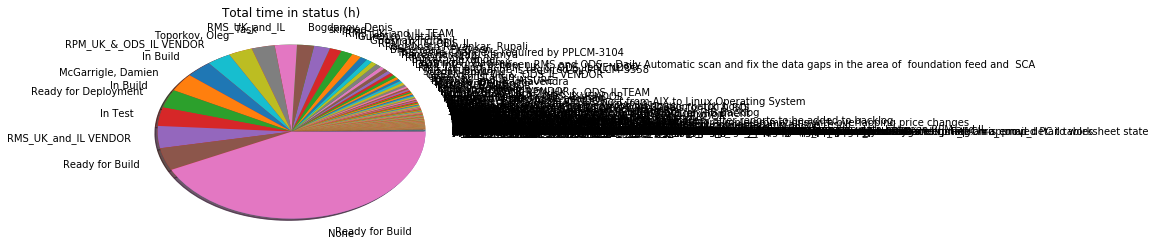

In [47]:
# pie()
plt.pie(grouped_list.DURATION, labels=grouped_list.OLD_VALUE,shadow=True,labeldistance=1.2)
#plt.pie()
plt.title('Total time in status (h)')

#### extended report
# pie()
plt.pie(grouped_list_e.DURATION, labels=grouped_list_e.OLD_VALUE,shadow=True,labeldistance=1.2)
#plt.pie()
plt.title('Total time in status (h)')